In [1]:
from google.colab.patches import cv2_imshow

In [2]:
import cv2

In [3]:
!pip install --user tensorflow
!pip install --user keras

In [4]:
from keras.models import Sequential
from keras.layers import Dense

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix

In [6]:
(X_train, Y_train),(X_test, Y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [7]:
type(X_train)

numpy.ndarray

In [8]:
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [9]:
print(X_train[1])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  51 159 253
  159  50   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0  48 238 252 252
  252 237   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  54 227 253 252 239
  233 252  57   6   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  10  60 224 252 253 252 202
   84 252 253 122   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 163 252 252 252 25

In [10]:
print(X_train[10].shape)

(28, 28)


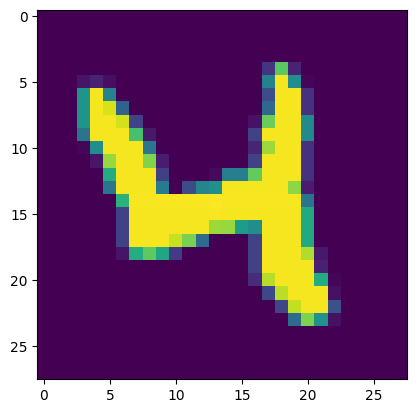

2


In [11]:
plt.imshow(X_train[20])
plt.show()
print(Y_train[25])

In [12]:
print(Y_train.shape, Y_test.shape)

(60000,) (10000,)


In [13]:
print(np.unique(Y_train))
print(np.unique(Y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


In [14]:
X_train = X_train/255
X_test = X_test/255

In [15]:
print(X_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [16]:
model = keras.Sequential([
                          keras.layers.Flatten(input_shape=(28,28)),
                          keras.layers.Dense(50, activation='relu'),
                          keras.layers.Dense(50, activation='relu'),
                          keras.layers.Dense(10, activation='sigmoid')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [17]:
model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [61]:
model.fit(X_train,Y_train, epochs=30)

Epoch 1/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9671 - loss: 0.0076
Epoch 2/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9669 - loss: 0.0075
Epoch 3/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9643 - loss: 0.0077
Epoch 4/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9662 - loss: 0.0068
Epoch 5/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9645 - loss: 0.0088
Epoch 6/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9522 - loss: 0.0095
Epoch 7/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9491 - loss: 0.0066
Epoch 8/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9597 - loss: 0.0063
Epoch 9/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9627 - loss: 0.0041
Epoch 10/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9569 - loss: 0.0082
Epoch 11/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9624 - loss: 0.0068
Epoch 12/30
1875/1875 ━━━━━━━━

In [19]:
loss, accuracy = model.evaluate(X_test, Y_test)
print(accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9656 - loss: 0.1734
0.9688000082969666


In [20]:
print(X_test.shape)

(10000, 28, 28)


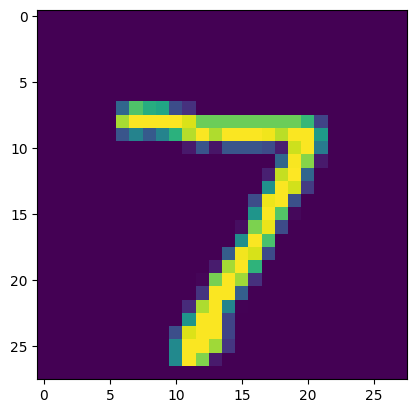

In [21]:
plt.imshow(X_test[0])
plt.show()

In [22]:
print(Y_test[0])

7


In [23]:
Y_pred = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [24]:
print(Y_pred.shape)

(10000, 10)


In [25]:
print(Y_pred[0])

[2.2460247e-08 1.6588712e-02 5.5124434e-07 1.2532665e-01 5.2993623e-06
 9.2802911e-06 5.8765937e-22 9.9999988e-01 2.0291729e-04 9.5738637e-01]


In [26]:
label_for_first_test_image = np.argmax(Y_pred[0])
print(label_for_first_test_image)

7


In [27]:
Y_pred_labels = [np.argmax(i) for i in Y_pred]
print(Y_pred_labels)

[np.int64(7), np.int64(2), np.int64(1), np.int64(0), np.int64(4), np.int64(1), np.int64(4), np.int64(9), np.int64(6), np.int64(9), np.int64(0), np.int64(6), np.int64(9), np.int64(0), np.int64(1), np.int64(5), np.int64(9), np.int64(7), np.int64(8), np.int64(4), np.int64(9), np.int64(6), np.int64(6), np.int64(5), np.int64(4), np.int64(0), np.int64(7), np.int64(4), np.int64(0), np.int64(1), np.int64(3), np.int64(1), np.int64(3), np.int64(4), np.int64(7), np.int64(2), np.int64(7), np.int64(1), np.int64(2), np.int64(1), np.int64(1), np.int64(7), np.int64(4), np.int64(2), np.int64(3), np.int64(5), np.int64(1), np.int64(2), np.int64(4), np.int64(4), np.int64(6), np.int64(3), np.int64(5), np.int64(5), np.int64(6), np.int64(0), np.int64(4), np.int64(1), np.int64(9), np.int64(5), np.int64(7), np.int64(8), np.int64(9), np.int64(3), np.int64(7), np.int64(4), np.int64(6), np.int64(4), np.int64(3), np.int64(0), np.int64(7), np.int64(0), np.int64(2), np.int64(9), np.int64(1), np.int64(7), np.int64(3)

In [28]:
print(Y_pred)

[[2.2460247e-08 1.6588712e-02 5.5124434e-07 ... 9.9999988e-01
  2.0291729e-04 9.5738637e-01]
 [4.4370504e-04 9.9885583e-01 1.0000000e+00 ... 1.9249502e-03
  6.5982451e-05 2.0894569e-15]
 [7.1820682e-06 9.9998045e-01 3.5032295e-02 ... 5.4849428e-01
  3.5946067e-02 3.2930410e-07]
 ...
 [6.9120954e-16 4.9354540e-12 2.4039424e-14 ... 1.4193058e-03
  8.0666148e-08 9.9976701e-01]
 [2.3848520e-06 7.3227300e-09 5.0603558e-07 ... 2.4085919e-10
  9.9996662e-01 3.4533397e-05]
 [9.4521065e-06 1.0729371e-16 9.2534155e-01 ... 3.7863709e-18
  4.3071973e-06 2.9459631e-17]]


In [29]:
conf_mat = confusion_matrix(Y_test, Y_pred_labels)

In [30]:
print(conf_mat)

tf.Tensor(
[[ 964    0    1    1    1    1    8    0    1    3]
 [   0 1123    4    0    0    1    4    0    3    0]
 [   3   34  977    3    1    1    2    3    8    0]
 [   1    0   10  981    0    3    1    4    8    2]
 [   0    0    4    1  960    0    6    3    1    7]
 [   1    2    0   16    2  846   10    0   11    4]
 [   6    1    0    0    2    3  945    0    1    0]
 [   1    3   12    3    1    0    1  982    3   22]
 [   1    0    3    5    3    1    8    2  947    4]
 [   4    2    0    8   15    7    1    3    6  963]], shape=(10, 10), dtype=int32)


Text(0.5, 47.7222222222222, 'Predicted Labels')

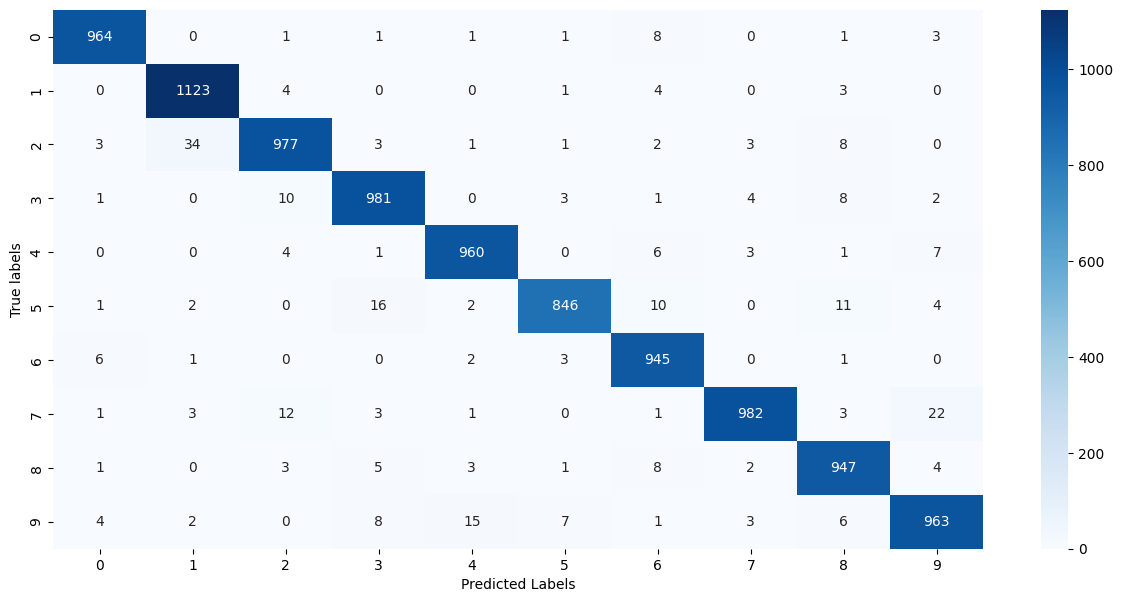

In [31]:
plt.figure(figsize=(15,7))
sns.heatmap(conf_mat, annot = True, fmt='d', cmap='Blues')
plt.ylabel('True labels')
plt.xlabel('Predicted Labels')

In [55]:
input_image_path = '/content/png-transparent-number-number-6-image-file-formats-orange-number-thumbnail.png'

input_image = cv2.imread(input_image_path)

In [56]:
type(input_image)

numpy.ndarray

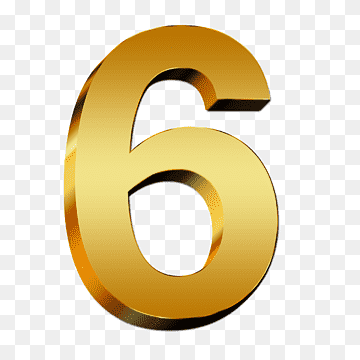

In [57]:
cv2_imshow(input_image)

In [38]:
input_image.shape

(360, 360, 3)

In [39]:
grayscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)

In [40]:
grayscale.shape

(360, 360)

In [41]:
input_image_resize = cv2.resize(grayscale, (28,28))

In [42]:
input_image_resize.shape

(28, 28)

In [43]:
cv2_imshow(input_image_resize)

In [44]:
input_image_resize=input_image_resize/255

In [45]:
image_reshaped = np.reshape(input_image_resize, [1,28,28])

In [51]:
input_prediction = model.predict(image_reshaped)
print(input_prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
[[0.0000000e+00 2.0221306e-29 9.9962592e-01 1.0000000e+00 0.0000000e+00
  4.3656654e-04 0.0000000e+00 3.3608353e-04 0.0000000e+00 0.0000000e+00]]


In [52]:
input_pred_label = np.argmax(input_prediction)


In [53]:
print(input_pred_label)

3


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


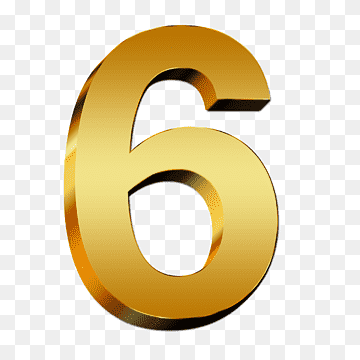

3


In [62]:
input_image_path = '/content/png-transparent-number-number-6-image-file-formats-orange-number-thumbnail.png'

input_image = cv2.imread(input_image_path)

type(input_image)

grayscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)

input_image_resize = cv2.resize(grayscale, (28,28))

input_image_resize=input_image_resize/255

image_reshaped = np.reshape(input_image_resize, [1,28,28])

input_prediction = model.predict(image_reshaped)

input_pred_label = np.argmax(input_prediction)
cv2_imshow(input_image)
cv2_imshow(input_image_resize)
print(input_pred_label)